## Observations and Insights

## Dependencies and starter code

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_dataresults = pd.DataFrame(pd.merge(mouse_metadata ,study_results, on="Mouse ID", how="inner"))

mouse_dataresults.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_evaluation =pd.DataFrame(mouse_dataresults["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem']))
tumor_evaluation.head() 

,Tumor Volume (mm3)
mean,50.448381
median,48.951474
var,79.116074
std,8.894722
sem,0.204436


## Bar plots

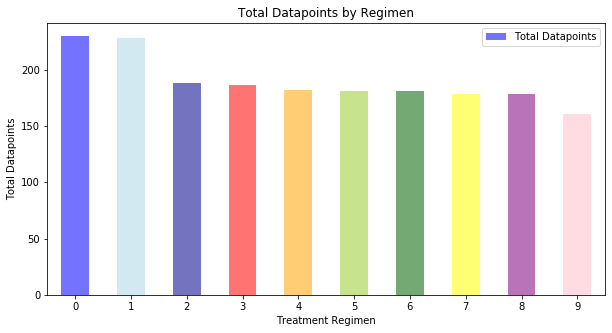

In [51]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

tumor_drugreg = mouse_dataresults.groupby("Drug Regimen")
datapoint_reg = pd.DataFrame(tumor_drugreg["Tumor Volume (mm3)"].count()).rename(columns={"Tumor Volume (mm3)": "Total Datapoints"})
regimen_df = datapoint_reg.rename(columns={"Drug Regimen": "Regimen"})

regimen_df = pd.DataFrame(regimen_df.sort_values("Total Datapoints", ascending=False)).reset_index()

colors= ["blue","lightblue","darkblue","red","orange","yellowgreen","darkgreen","yellow","purple","pink"]

regimen_df.plot(kind="bar", figsize=(10,5), color=[colors], alpha=0.55, align="center")

plt.xticks(rotation="0")

plt.title("Total Datapoints by Regimen")

#label
plt.xlabel("Treatment Regimen")
plt.ylabel("Total Datapoints")
plt.show()



## Pie plots

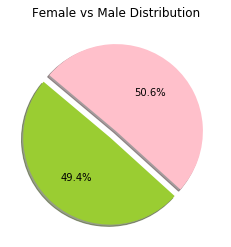

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
female_vs_mail = mouse_dataresults.groupby("Sex")["Sex"].count()
colors = ["yellowgreen", "pink"] 
plt.title("Female vs Male Distribution")
explode = (0.1, 0)
plt.pie(female_vs_mail, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, explode = (0.1, 0))
plot = female_vs_mail.plot.pie


(-1.1874943525713364,
 1.1105268056883157,
 -1.1938032889323704,
 1.112116577938631)

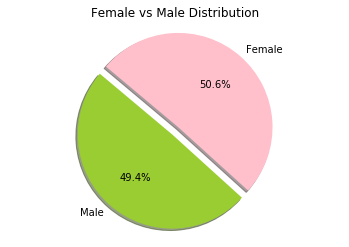

In [50]:
 # Generate a pie plot showing the distribution of female versus male mice using pyplot
distribution_results = mouse_dataresults.groupby("Sex")["Sex"].count()
labels = ["Male", "Female"]

colors = ["yellowgreen", "pink"] 
explode = (0.1, 0)
plt.title("Female vs Male Distribution")
plt.pie(distribution_results, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, explode = (0.1, 0))

plt.axis("equal")

## Line and scatter plots

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
